In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

path = os.getcwd() + '/ex2data1.txt' 

data = pd.read_csv(path , header=None , names = ['exam1' ,'exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0,0.5,'Exam 2')

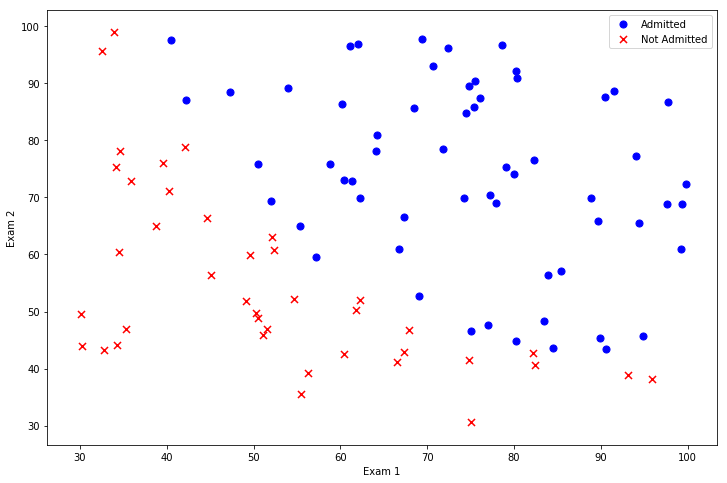

In [17]:
positive = data[data['admitted'].isin([1])]  
negative = data[data['admitted'].isin([0])]
fig , ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['exam1'], positive['exam2'] , s=50, c='b' ,marker='o' , label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r' ,marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

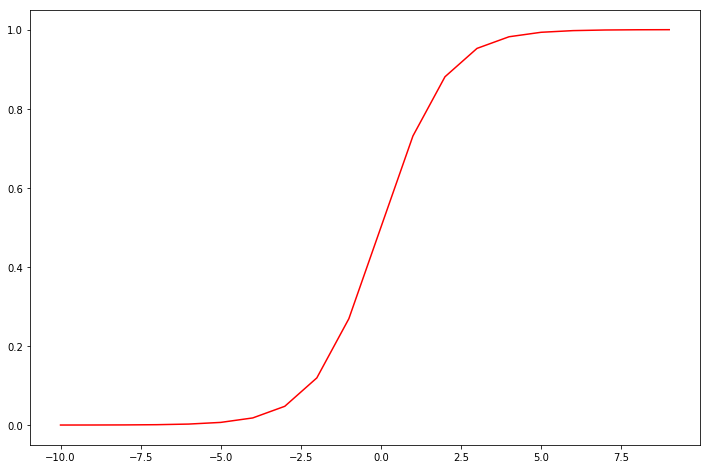

In [26]:
nums = np.arange(-10 , 10 , step=1)
#nums
fig, ax = plt.subplots( figsize = (12,8))
ax.plot(nums, sigmoid(nums) , 'r')

In [43]:
def cost(theta , X , y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply(1-y, np.log(1 - sigmoid(X*theta.T)))
    return np.sum(first-second) / len(X)

In [32]:
#data.insert(0, 'Ones', 1)
data


,Ones,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
5,1,45.083277,56.316372,0
6,1,61.106665,96.511426,1
7,1,75.024746,46.554014,1
8,1,76.098787,87.420570,1
9,1,84.432820,43.533393,1


In [34]:
cols = data.shape[1]
cols

4

In [36]:
X = data.iloc[:,0:cols-1]
X

,Ones,exam1,exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376
5,1,45.083277,56.316372
6,1,61.106665,96.511426
7,1,75.024746,46.554014
8,1,76.098787,87.420570
9,1,84.432820,43.533393


In [37]:
y = data.iloc[:,cols-1:cols]
y

,admitted
0,0
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [39]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)


In [40]:
X.shape , y.shape , theta.shape

((100, 3), (100, 1), (3,))

In [44]:
cost(theta,X,y)

0.6931471805599453

In [45]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error , X[:,i])
        grad[i] = np.sum(term) / len(X)
        
    return grad

In [49]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost , x0=theta , fprime=gradient , args=(X,y))
cost(result[0], X , y)

0.20349770158947458

In [66]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print(accuracy)

89


Text(0,0.5,'Test 2 Score')

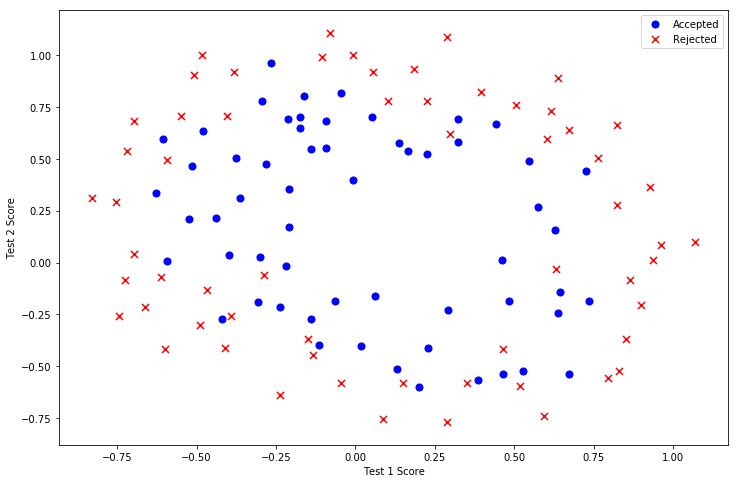

In [17]:
path = os.getcwd() + '/ex2data2.txt'

data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])

positive = data2[data2['Accepted'].isin([1])]  
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')  

In [18]:
degree = 5  
x1 = data2['Test 1']  
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)  
data2.drop('Test 2', axis=1, inplace=True)

data2.head()  

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [19]:
def costReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [27]:
def gradientReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])

    return grad

In [28]:
cols = data2.shape[1]  
X2 = data2.iloc[:,1:cols]  
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)  
y2 = np.array(y2.values)  
theta2 = np.zeros(11)


learningRate = 1

costReg(theta2, X2, y2, learningRate)  

0.6931471805599454